<center>
<h1>Credit Default Analysis
    <center>

<div id="about_dataset">
     <h2>About the dataset</h2>
    <br>
    NT Dollar = New Taiwan Dollar ~ Aprox 30.00 USD <br>

| Field          |  Description                                                                           |
| :-             | :- |
| Limit_Bal      | Amount of the given credit (NT dollar)                                                |
| Sex            | 0: Female / 1: Male                                                                   |
| Marriage       | 1: Married / 2: Single / 3: Divorced / 0: Others                                      |
| PAY_0 - PAY_6  | History of past payment. (from April to September, 2005)<br>     |                |                                                                                         |
| BILL_AMT1 - BILL_AMT6       | Amount of bill statement (NT dollar)    
| PAY_AMT1 - PAY_AMT6                |Amount of previous payment (NT dollar)
| Default                |0: Not Default / 1: Default
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |

The measurement scale for the repayment status is (PAY_1):<br>
  - -2: No consumption <br>
  - -1: Paid in full<br>
  -  0: The use of revolving credit<br>
  -  1: payment delay
for one month <br>
  - 2: payment delay for two months<br> . . .
<br>
  - 9: payment delay for nine months and above.<br>



Amount of bill statement:<br>
- BILL_AMT1: amount of bill statement in September, 2005.
<br> . . .<br>
- BILL_AMT6: amount of bill statement in April, 2005.<br><br>

Amount of previous payment:<br>
  - PAY_AMT1: amount paid in September, 2005.<br>
. . .
  - PAY_AMT6: amount paid in April, 2005.<br>

## Data Visualization and pre-processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv(r'C:\Users\andre\OneDrive\Andrés Márquez\UBIQUM\Project 2\data0.csv')

In [3]:
df.head()

,MyUnknownColumn,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,default
2,2,120000,female,university,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,3,90000,female,university,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
4,4,50000,female,university,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default


In [4]:
df.duplicated(subset=['MyUnknownColumn']).value_counts()

False    30002
True       202
dtype: int64

In [5]:
df = df.drop_duplicates()

In [6]:
df.duplicated(subset=['MyUnknownColumn']).value_counts()

False    30002
dtype: int64

In [7]:
df.isnull().any()

MyUnknownColumn     True
X1                 False
X2                 False
X3                 False
X4                 False
X5                 False
X6                 False
X7                 False
X8                 False
X9                 False
X10                False
X11                False
X12                False
X13                False
X14                False
X15                False
X16                False
X17                False
X18                False
X19                False
X20                False
X21                False
X22                False
X23                False
Y                  False
dtype: bool

In [8]:
df[df['MyUnknownColumn'].isnull()].index.tolist()

[202]

In [9]:
df.iloc[[202]]

,MyUnknownColumn,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
202,NaN,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y


*We can see that the row with index "202" has he same values as our columns names and that it has a NaN value in the "MyUnknownColumn" which belongs to the ID of the customers, so we'll be dropping this row too.

In [10]:
df.dropna(subset=['MyUnknownColumn'], axis=0, inplace = True)

In [11]:
df.iloc[[202]]

,MyUnknownColumn,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
405,202,140000,male,graduate school,2,31,0,0,2,0,...,20225,27407,10833,25000,0,3000,7800,0,2500,not default


In [12]:
df.isnull().any()

MyUnknownColumn    False
X1                 False
X2                 False
X3                 False
X4                 False
X5                 False
X6                 False
X7                 False
X8                 False
X9                 False
X10                False
X11                False
X12                False
X13                False
X14                False
X15                False
X16                False
X17                False
X18                False
X19                False
X20                False
X21                False
X22                False
X23                False
Y                  False
dtype: bool

Next, we'll be changing the names of the columns from our dataset in order for us to indentify each column in an easier way. So, our first row is becoming the names of our columns.

In [13]:
df.iloc[[0]]

,MyUnknownColumn,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month


In [14]:
df = df.rename(columns=df.iloc[0]).loc[1:]

In [15]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,default
2,2,120000,female,university,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,3,90000,female,university,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
4,4,50000,female,university,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
5,5,50000,male,university,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


In [16]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [17]:
df.rename(columns={'default payment next month':'DEFAULT', 'PAY_0':'PAY_1'}, inplace=True)

In [18]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30203
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         30000 non-null  object
 1   LIMIT_BAL  30000 non-null  object
 2   SEX        30000 non-null  object
 3   EDUCATION  30000 non-null  object
 4   MARRIAGE   30000 non-null  object
 5   AGE        30000 non-null  object
 6   PAY_1      30000 non-null  object
 7   PAY_2      30000 non-null  object
 8   PAY_3      30000 non-null  object
 9   PAY_4      30000 non-null  object
 10  PAY_5      30000 non-null  object
 11  PAY_6      30000 non-null  object
 12  BILL_AMT1  30000 non-null  object
 13  BILL_AMT2  30000 non-null  object
 14  BILL_AMT3  30000 non-null  object
 15  BILL_AMT4  30000 non-null  object
 16  BILL_AMT5  30000 non-null  object
 17  BILL_AMT6  30000 non-null  object
 18  PAY_AMT1   30000 non-null  object
 19  PAY_AMT2   30000 non-null  object
 20  PAY_AMT3   30000 non-null  o

We can see that our varibles are dtype object, this could be due to the fact that previously we had some mix types of data in our dataset.

In [20]:
pd.to_numeric(df['ID'])

1            1
2            2
3            3
4            4
5            5
         ...  
30199    29996
30200    29997
30201    29998
30202    29999
30203    30000
Name: ID, Length: 30000, dtype: int64

In [21]:
cols = ['ID', 'LIMIT_BAL', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [22]:
df = df.convert_dtypes()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30203
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         30000 non-null  Int64 
 1   LIMIT_BAL  30000 non-null  Int64 
 2   SEX        30000 non-null  string
 3   EDUCATION  30000 non-null  string
 4   MARRIAGE   30000 non-null  string
 5   AGE        30000 non-null  Int64 
 6   PAY_1      30000 non-null  Int64 
 7   PAY_2      30000 non-null  Int64 
 8   PAY_3      30000 non-null  Int64 
 9   PAY_4      30000 non-null  Int64 
 10  PAY_5      30000 non-null  Int64 
 11  PAY_6      30000 non-null  Int64 
 12  BILL_AMT1  30000 non-null  Int64 
 13  BILL_AMT2  30000 non-null  Int64 
 14  BILL_AMT3  30000 non-null  Int64 
 15  BILL_AMT4  30000 non-null  Int64 
 16  BILL_AMT5  30000 non-null  Int64 
 17  BILL_AMT6  30000 non-null  Int64 
 18  PAY_AMT1   30000 non-null  Int64 
 19  PAY_AMT2   30000 non-null  Int64 
 20  PAY_AMT3   30000 non-null  I

Let's create three more columns to assign numerical values to 'Education', 'Sex' and 'Default' variables.

In [24]:
df['EDUCATION'].value_counts()

university         14030
graduate school    10585
high school         4917
other                468
Name: EDUCATION, dtype: Int64

In [25]:
df['SEX'].value_counts()

female    18112
male      11888
Name: SEX, dtype: Int64

In [26]:
df['DEFAULT'].value_counts()

not default    23364
default         6636
Name: DEFAULT, dtype: Int64

We can see that we have a pretty umbalanced variable here, we need to take this into account when performing the models performance.

In [27]:
df.loc[df['EDUCATION'] == 'graduate school', 'EDUCATION_NUM'] = 1
df.loc[df['EDUCATION'] == 'university', 'EDUCATION_NUM'] = 2
df.loc[df['EDUCATION'] == 'high school', 'EDUCATION_NUM'] = 3
df.loc[df['EDUCATION'] == 'other', 'EDUCATION_NUM'] = 4

df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,EDUCATION_NUM
1,1,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,default,2.0
2,2,120000,female,university,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,default,2.0
3,3,90000,female,university,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,not default,2.0
4,4,50000,female,university,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,not default,2.0
5,5,50000,male,university,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,not default,2.0


In [28]:
df.loc[df['SEX'] == 'female', 'SEX_NUM'] = 0
df.loc[df['SEX'] == 'male', 'SEX_NUM'] = 1

df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,EDUCATION_NUM,SEX_NUM
1,1,20000,female,university,1,24,2,2,-1,-1,...,0,0,689,0,0,0,0,default,2.0,0.0
2,2,120000,female,university,2,26,-1,2,0,0,...,3261,0,1000,1000,1000,0,2000,default,2.0,0.0
3,3,90000,female,university,2,34,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,not default,2.0,0.0
4,4,50000,female,university,1,37,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,not default,2.0,0.0
5,5,50000,male,university,1,57,-1,0,-1,0,...,19131,2000,36681,10000,9000,689,679,not default,2.0,1.0


In [29]:
df.loc[df['DEFAULT'] == 'not default', 'DEFAULT_NUM'] = 0
df.loc[df['DEFAULT'] == 'default', 'DEFAULT_NUM'] = 1

df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,EDUCATION_NUM,SEX_NUM,DEFAULT_NUM
1,1,20000,female,university,1,24,2,2,-1,-1,...,0,689,0,0,0,0,default,2.0,0.0,1.0
2,2,120000,female,university,2,26,-1,2,0,0,...,0,1000,1000,1000,0,2000,default,2.0,0.0,1.0
3,3,90000,female,university,2,34,0,0,0,0,...,1518,1500,1000,1000,1000,5000,not default,2.0,0.0,0.0
4,4,50000,female,university,1,37,0,0,0,0,...,2000,2019,1200,1100,1069,1000,not default,2.0,0.0,0.0
5,5,50000,male,university,1,57,-1,0,-1,0,...,2000,36681,10000,9000,689,679,not default,2.0,1.0,0.0


In [30]:
df['ID'].duplicated().value_counts()

False    30000
Name: ID, dtype: int64

In [31]:
pd.set_option('display.max_columns', None)
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,EDUCATION_NUM,SEX_NUM,DEFAULT_NUM
1,1,20000,female,university,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,default,2.0,0.0,1.0
2,2,120000,female,university,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,default,2.0,0.0,1.0
3,3,90000,female,university,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default,2.0,0.0,0.0
4,4,50000,female,university,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default,2.0,0.0,0.0
5,5,50000,male,university,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,not default,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30199,29996,220000,male,high school,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,not default,3.0,1.0,0.0
30200,29997,150000,male,high school,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,not default,3.0,1.0,0.0
30201,29998,30000,male,university,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,default,2.0,1.0,1.0
30202,29999,80000,male,high school,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,default,3.0,1.0,1.0


In [32]:
df.corr()

,ID,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,EDUCATION_NUM,SEX_NUM,DEFAULT_NUM
ID,1.000000,0.026179,0.018678,-0.030575,-0.011215,-0.018494,-0.002735,-0.022199,-0.020270,0.019389,0.017982,0.024354,0.040351,0.016705,0.016730,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000,0.037659,-0.018497,-0.013952
LIMIT_BAL,0.026179,1.000000,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,-0.235195,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.231088,-0.024755,-0.153520
AGE,0.018678,0.144713,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,-0.048773,0.056239,0.054283,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.182434,0.090874,0.013890
PAY_1,-0.030575,-0.271214,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,0.474553,0.187068,0.189859,0.179785,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.112593,0.057643,0.324794
PAY_2,-0.011215,-0.296382,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,0.575501,0.234887,0.235257,0.224146,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.129703,0.070771,0.263551
PAY_3,-0.018494,-0.286123,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,0.632684,0.208473,0.237295,0.227494,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.122425,0.066096,0.235253
PAY_4,-0.002735,-0.267460,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,0.716449,0.202812,0.225816,0.244983,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.116531,0.060173,0.216614
PAY_5,-0.022199,-0.249411,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,0.816900,0.206684,0.226913,0.243335,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027,0.104088,0.055064,0.204149
PAY_6,-0.020270,-0.235195,-0.048773,0.474553,0.575501,0.632684,0.716449,0.816900,1.000000,0.207373,0.226924,0.241181,0.266356,0.290894,0.285091,-0.001496,-0.005223,0.005834,0.019018,-0.046434,-0.025299,0.088986,0.044008,0.186866
BILL_AMT1,0.019389,0.285430,0.056239,0.187068,0.234887,0.208473,0.202812,0.206684,0.207373,1.000000,0.951484,0.892279,0.860272,0.829779,0.802650,0.140277,0.099355,0.156887,0.158303,0.167026,0.179341,0.016597,0.033642,-0.019644


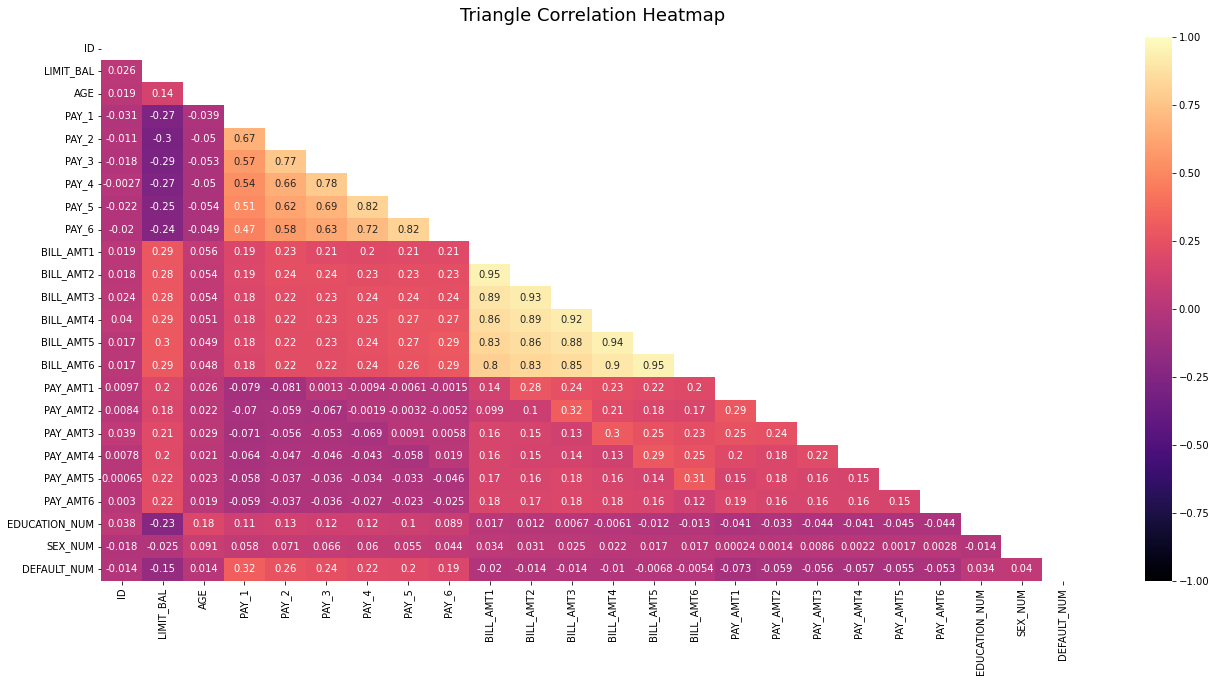

In [33]:
plt.figure(figsize=(22, 10))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='magma')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [34]:
dummy_edu = pd.get_dummies(df['EDUCATION'])
dummy_edu.head()

,graduate school,high school,other,university
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,0,0,0,1


In [35]:
frames = [df,dummy_edu]

In [36]:
df = pd.concat(frames, axis=1)

In [37]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,EDUCATION_NUM,SEX_NUM,DEFAULT_NUM,graduate school,high school,other,university
1,1,20000,female,university,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,default,2.0,0.0,1.0,0,0,0,1
2,2,120000,female,university,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,default,2.0,0.0,1.0,0,0,0,1
3,3,90000,female,university,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default,2.0,0.0,0.0,0,0,0,1
4,4,50000,female,university,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default,2.0,0.0,0.0,0,0,0,1
5,5,50000,male,university,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,not default,2.0,1.0,0.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30199,29996,220000,male,high school,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,not default,3.0,1.0,0.0,0,1,0,0
30200,29997,150000,male,high school,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,not default,3.0,1.0,0.0,0,1,0,0
30201,29998,30000,male,university,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,default,2.0,1.0,1.0,0,0,0,1
30202,29999,80000,male,high school,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,default,3.0,1.0,1.0,0,1,0,0


In [38]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT',
       'EDUCATION_NUM', 'SEX_NUM', 'DEFAULT_NUM', 'graduate school',
       'high school', 'other', 'university'],
      dtype='object')

array([[<AxesSubplot:title={'center':'LIMIT_BAL'}>,
        <AxesSubplot:title={'center':'AGE'}>]], dtype=object)

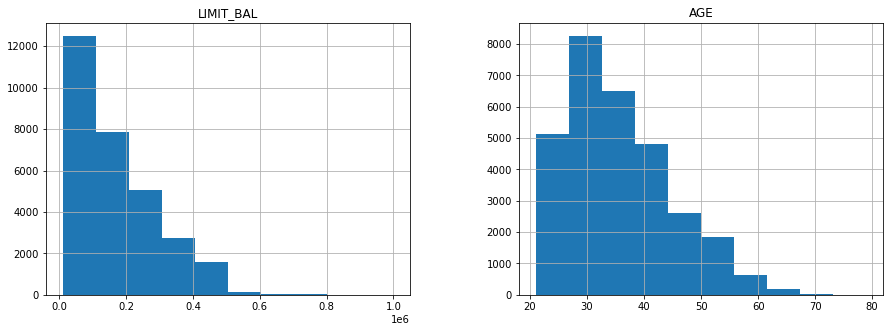

In [39]:
df[['LIMIT_BAL','AGE']].hist(figsize=(15,5))

In [40]:
df[['LIMIT_BAL','AGE']].describe()

,LIMIT_BAL,AGE
count,30000.000000,30000.000000
mean,167484.322667,35.485500
std,129747.661567,9.217904
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,1000000.000000,79.000000


Values makes sense, the credit minimun is 10.000 which is higher than 0. For age the minimun is 21 and is reasonably distributed.

In [41]:
df['EDUCATION'].value_counts()

university         14030
graduate school    10585
high school         4917
other                468
Name: EDUCATION, dtype: Int64

In [42]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: Int64

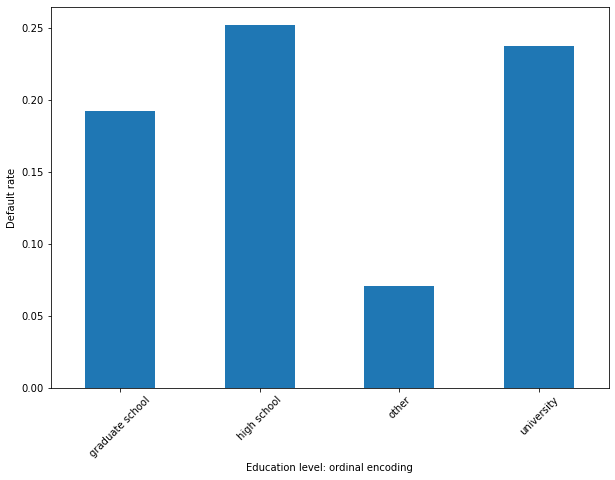

In [43]:
df.groupby('EDUCATION').agg({'DEFAULT_NUM':'mean'}).plot.bar(figsize=(10,7), legend=False)
plt.xticks(rotation = 45)
plt.ylabel('Default rate')
plt.xlabel('Education level: ordinal encoding')
plt.show()

It looks like people with education level of High-School and University tend to default more than graduate from school or other education situation.

In case a feature has a non-linear effect like this, it may be better to use a more complex algorithm such as a Decision Tree or Random Forest. Or, if a simpler and more interpretable linear model such as Logistic Regression is desired, we could avoid an ordinal encoding and use a different way of encoding categorical variables. A popular way of doing this is called one-hot encoding (OHE), which we already did when using "pd.get_dummies".

The remaining features to be examined are the financial history features. They fall naturally into three groups: the status of the monthly payments for the last 6 months, and the billed and paid amounts for the same period. First, let's look at the payment statuses. It is convenient to break these out as a list so we can study them together. 

In [44]:
pay_feats = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [45]:
df[pay_feats].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


Looks like the value 9, described as "payment delay for 9 months and above" seems to not be in our dataset.

In [46]:
df['PAY_1'].value_counts().sort_index()

-2     2759
-1     5686
0     14737
1      3688
2      2667
3       322
4        76
5        26
6        11
7         9
8        19
Name: PAY_1, dtype: Int64

Compared to the positive integer values, most of the values are either -2, -1, or 0, which correspond to an account that was in good standing last month: not used, paid in full, or made at least the minimum payment.

We can see that this feature is a hybrid of categorical and numerical features, looks like the creator of the dataset tried to sneak some categorical values (-2,-1 and 0) to what looks a numerical feature. This might have potential effects in the predictive capability of this feature.

In [47]:
pay_bins = np.array(range(-2,10)) - 0.5
pay_bins

array([-2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,
        8.5])

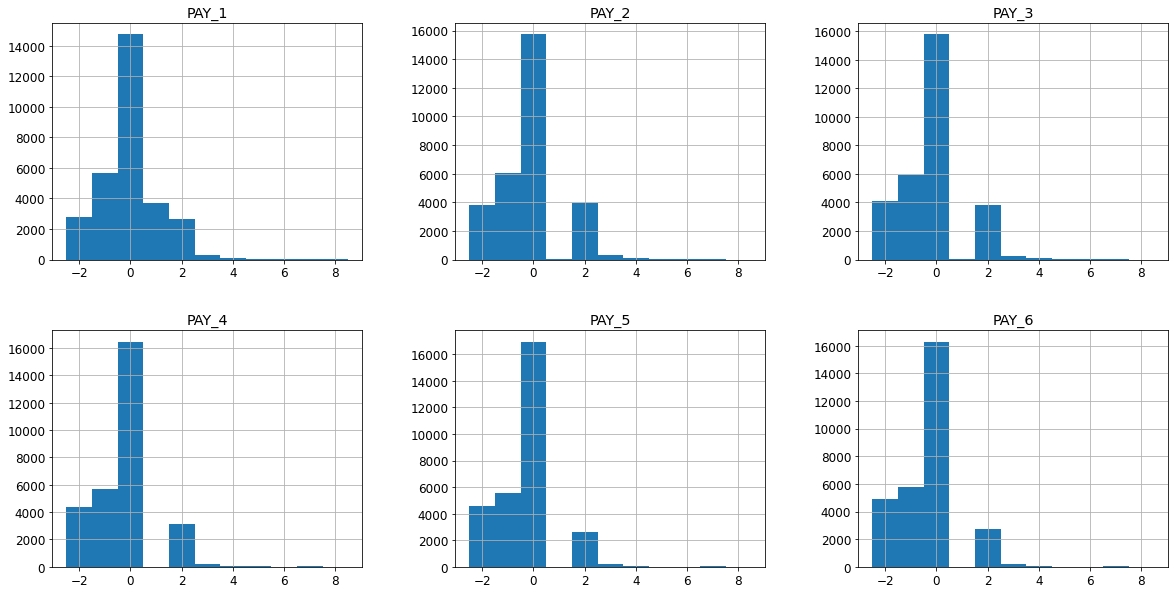

In [48]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 12
df[pay_feats].hist(bins=pay_bins, layout=(2,3), figsize=(20,10))
plt.show()

This does not make sense: the number of accounts with a 2-month delay in a given month should be less than or equal to the number of accounts with a 1-month delay in the previous month.

Accounts with a 2-month delay in August and see what the payment status was in July.

In [49]:
df.loc[df['PAY_2']==2, ['PAY_2', 'PAY_3']].head()

,PAY_2,PAY_3
1,2,-1
2,2,0
14,2,2
16,2,0
51,2,2


It's clear that accounts with a 2-month delay in August have  nonsensical values for the July payment status. The only way to progress to a 2-month delay should be from a 1-month delay the previous month, yet none of these accounts indicate that.

Since we can't contact the person who created the database and see that this problem might come for all the variables except for PAY_1 (because is the only truly representative) we will drop the rest of the variables for further analysis and predictions.

In [50]:
pay_amt_feats = ['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [51]:
bill_feats = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3','BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

In [52]:
df[bill_feats].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


We notice there are some negative bill amounts. This seems reasonable because of the possible overpayment of the previous month's bill, perhaps in anticipation of a purchase that would show up on the current month's bill. A scenario like this would leave that account with a negative balance, in the sense of a credit to the account holder.

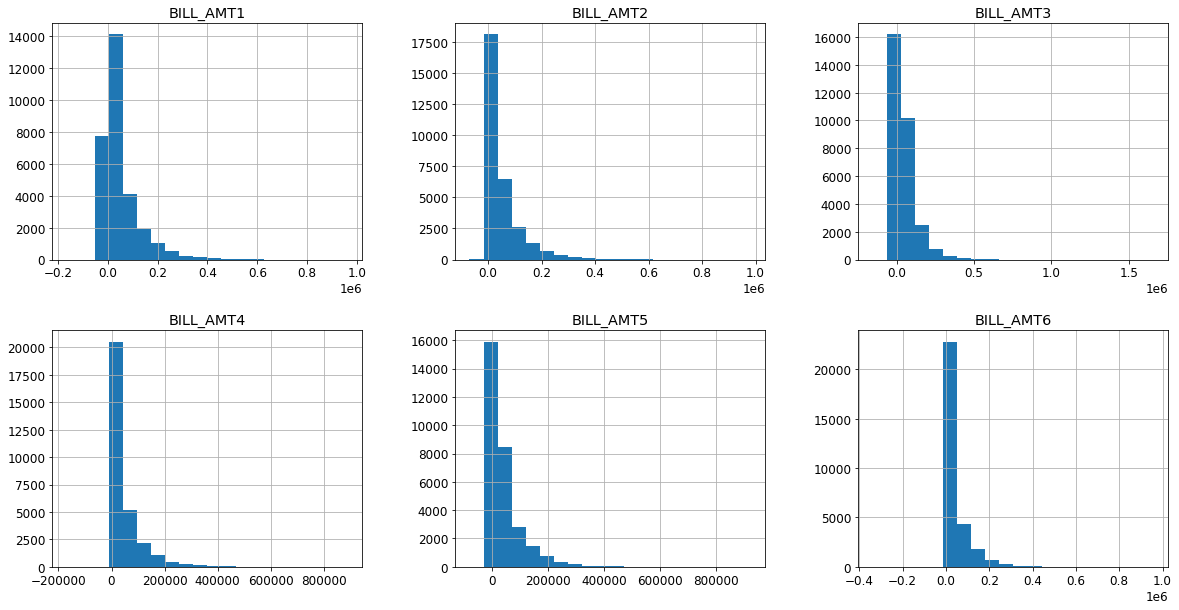

In [53]:
df[bill_feats].hist(bins=20, layout=(2,3),figsize=(20,10))
plt.show()

The histogram plots make sense in several respects. Most accounts have relatively small bills. There is a steady decrease in the number of accounts as the amount of the bill increases. It also appears that the distribution of billed amounts is roughly similar month to month, so we don't notice any data inconsistency issues as we did with the payment status features. This feature appears to pass our data quality inspection.

In [54]:
df[pay_amt_feats].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


The average payment amounts are about an order of magnitude (power of 10) lower than the average bill amounts we summarized earlier in the activity. This means that the "average case" is an account that is not paying off its entire balance from month to month. This makes sense in light of our exploration of the PAY_1 feature, for which the most prevalent value was 0 (the account made at least the minimum payment but did not pay off the whole balance). There are no negative payments, which also seems right.

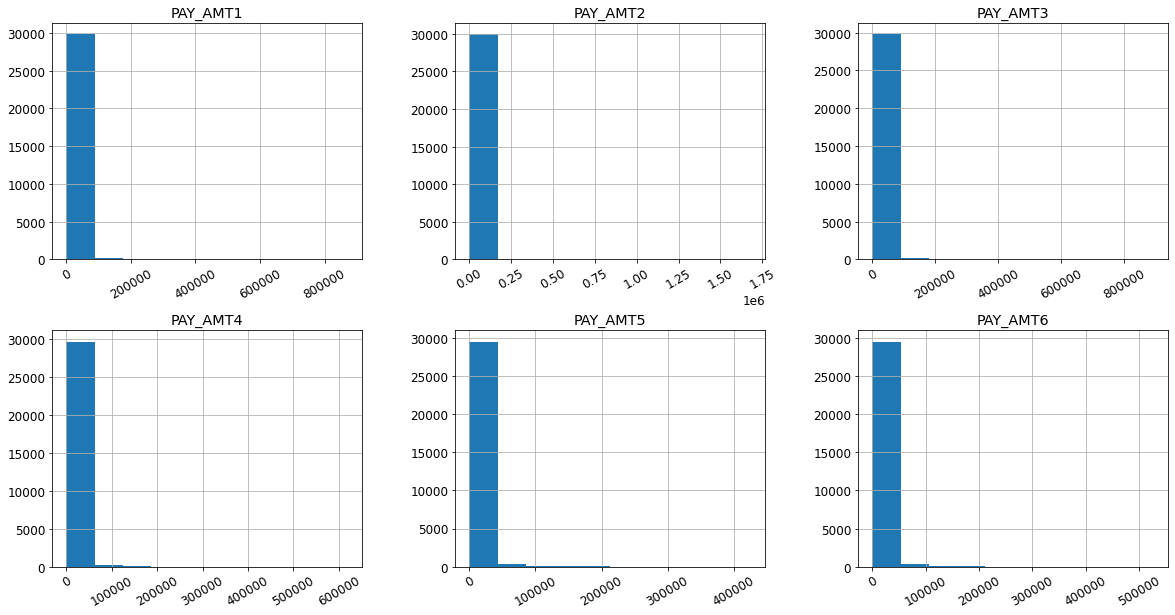

In [55]:
df[pay_amt_feats].hist(layout=(2,3), xrot=30, figsize=(20,10))
plt.show()

A quick glance at this figure indicates that this is not a very informative graphic; there is only one bin in most of the histograms that is of a noticeable height. This is not an effective way to visualize this data. It appears that the monthly payment amounts are mainly in a bin that includes 0. How many are in fact 0?

In [56]:
pay_zero_mask = df[pay_amt_feats] == 0
pay_zero_mask.sum()

PAY_AMT1    5249
PAY_AMT2    5396
PAY_AMT3    5968
PAY_AMT4    6408
PAY_AMT5    6703
PAY_AMT6    7173
dtype: int32

We see that a substantial portion, roughly around 20-25% of accounts, have a bill payment equal to 0 in any given month. However, most bill payments are above 0. So, why can't we see them in the histogram? This is due to the range of values for bill payments relative to the values of the majority of the bill payments.In the statistical summary, we can see that the maximum bill payment in a month is typically 2 orders of magnitude (100 times) larger than the average bill payment. It seems likely there are only a small number of these very large bill payments. But, because of the way the histogram is created, using equalsized bins, nearly all the data is lumped into the smallest bin, and the larger bins are nearly invisible because they have so few accounts. We need a strategy to effectively visualize this data.


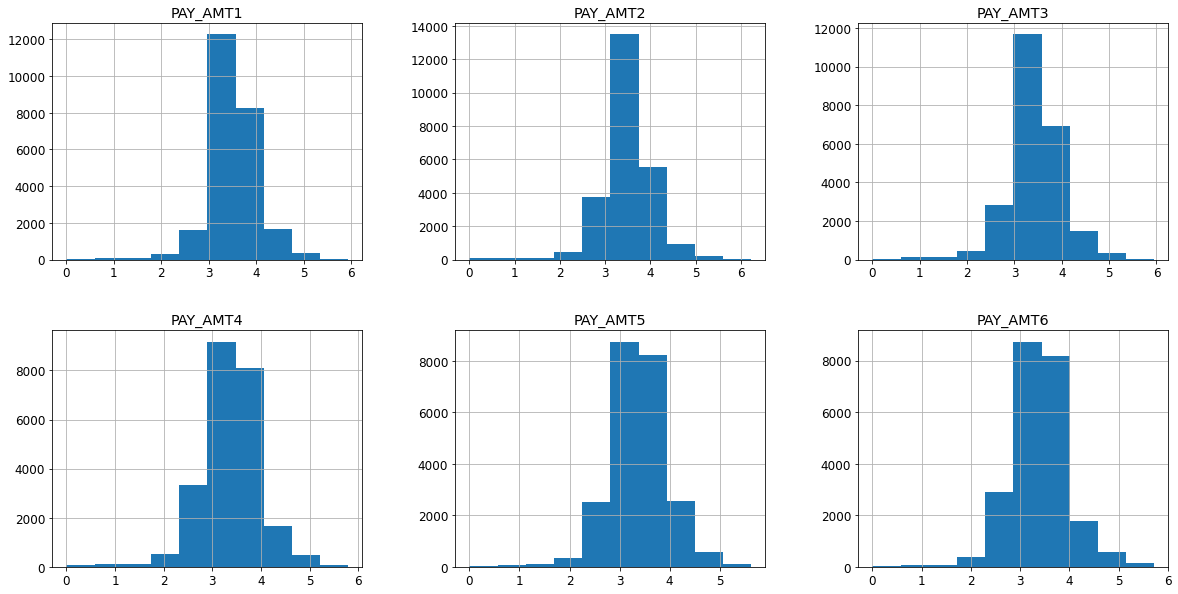

In [57]:
df[pay_amt_feats][~pay_zero_mask].apply(np.log10).hist(layout=(2,3),figsize=(20,10))
plt.show()

We can see that the most commonly occurring bill payments are in the range of thousands (log10(1,000) = 3), which matches what we observed for the mean bill payment in the statistical summary. There are some pretty small bill payments, and also a few pretty large ones. Overall, the distribution of bill payments appears pretty consistent from month to month, so we don't see any potential issues with this data.


<AxesSubplot:>

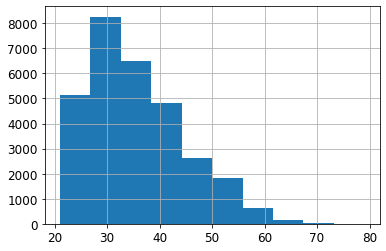

In [58]:
df['AGE'].hist()

In [59]:
import pylab 
import scipy.stats as stats

stats.jarque_bera(df['AGE'])

Jarque_beraResult(statistic=2683.082544390516, pvalue=0.0)

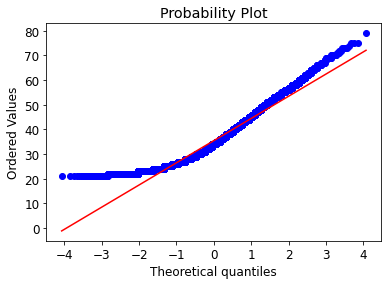

In [60]:
measurements = np.random.normal(loc = 20, scale = 5, size=100) ,stats.probplot(df['AGE'].astype('float'), dist="norm", plot=pylab)
pylab.show()

Age doesn't follow a normal distribution

In [61]:
items_to_remove = ['ID', 'SEX','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','EDUCATION_CAT', 'graduate school', 'high school', 'none','others', 'university', 'SEX_NUM', 'DEFAULT','EDUCATION', 'other']

In [62]:
features_response = df.columns.tolist()

In [63]:
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'EDUCATION_NUM',
 'DEFAULT_NUM']

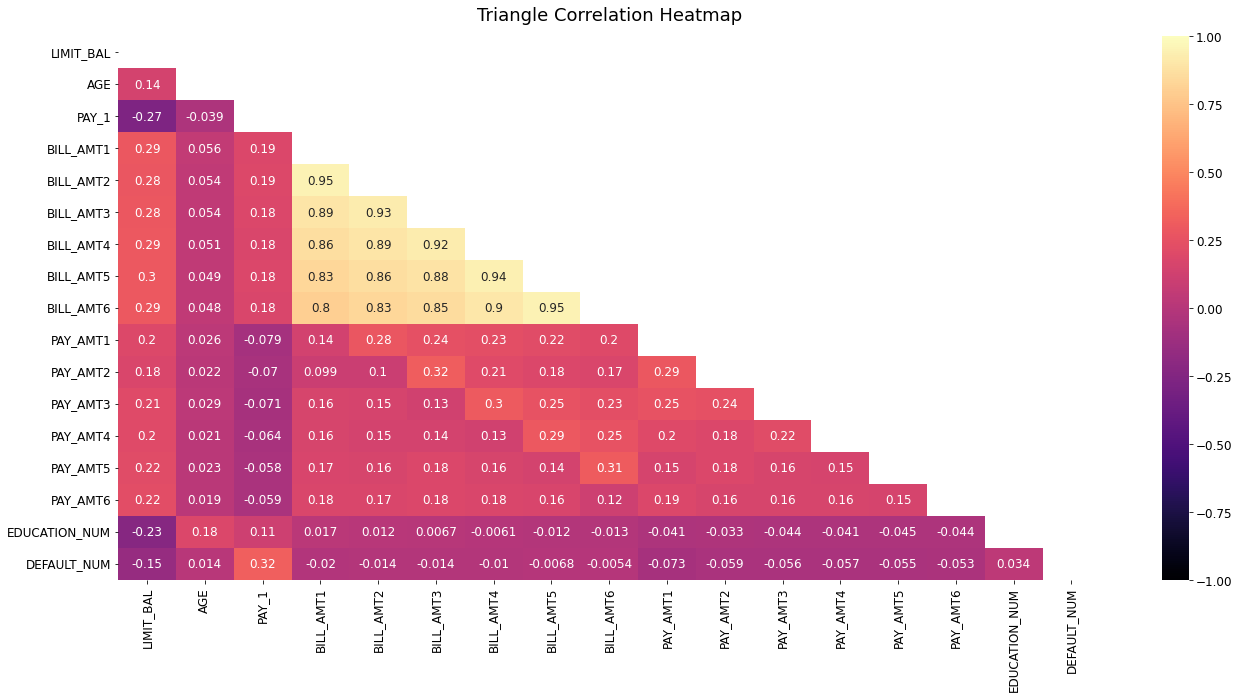

In [64]:
plt.figure(figsize=(22, 10))

mask = np.triu(np.ones_like(df[features_response].corr(), dtype=np.bool))
heatmap = sns.heatmap(df[features_response].corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='magma')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

We can see that we might have collinearity between the variables of amount bill statement. So let's check that out.

While multicollinearity does not reduce a model's overall predictive power, it can produce estimates of the regression coefficients that are not statistically significant. In a sense, it can be thought of as a kind of double-counting in the model.

In [65]:
bill_amt_features = ['BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',]

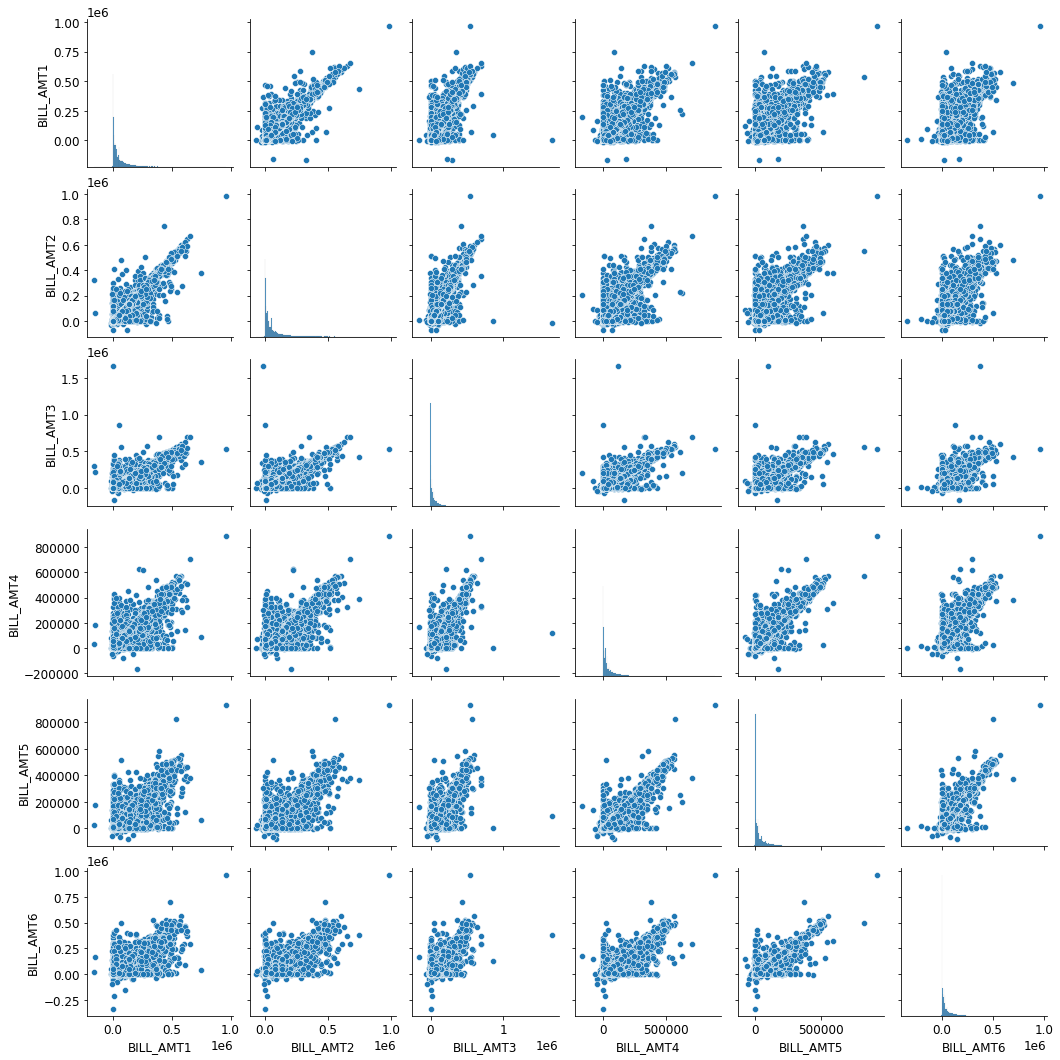

In [66]:
sns.pairplot(df[bill_amt_features])

<b>Variance Inflation Factor</b> measures how much the behavior (variance) of an independent variable is influenced, or inflated, by its interaction/correlation with the other independent variables. (A VIF of 1 indicates two variables are not correlated, a VIF between 1 and 5 indicates moderate correlation, and a VIF above 5 indicates high correlation).

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# the independent variables set
X = df[bill_amt_features].astype('float')
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data.sort_values('VIF', ascending = False))

     feature        VIF
1  BILL_AMT2  23.660203
4  BILL_AMT5  22.604274
3  BILL_AMT4  19.294916
2  BILL_AMT3  15.685823
0  BILL_AMT1  15.676637
5  BILL_AMT6  13.820638


We are going to remove them one by one in order to avoid loosing valuable information.

In [68]:
bill_amt_features.remove('BILL_AMT2')

X = df[bill_amt_features].astype('float')
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data.sort_values('VIF', ascending = False))

     feature        VIF
3  BILL_AMT5  22.597369
2  BILL_AMT4  19.190429
4  BILL_AMT6  13.814291
1  BILL_AMT3  13.366894
0  BILL_AMT1   7.503446


In [69]:
bill_amt_features.remove('BILL_AMT5')

X = df[bill_amt_features].astype('float')
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data.sort_values('VIF', ascending = False))

     feature        VIF
2  BILL_AMT4  14.821465
1  BILL_AMT3  13.360006
3  BILL_AMT6   7.704382
0  BILL_AMT1   7.494316


In [70]:
bill_amt_features.remove('BILL_AMT4')

X = df[bill_amt_features].astype('float')
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data.sort_values('VIF', ascending = False))

     feature       VIF
1  BILL_AMT3  9.649123
0  BILL_AMT1  7.351670
2  BILL_AMT6  5.369607


In [71]:
bill_amt_features.remove('BILL_AMT3')

X = df[bill_amt_features].astype('float')
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data.sort_values('VIF', ascending = False))

     feature       VIF
0  BILL_AMT1  3.942043
1  BILL_AMT6  3.942043


Now, given that the with the highest correlation with default is BILL_AMT1, we'll keep that one and remove BILL_AMT6.

In [72]:
bill_amt_features.remove('BILL_AMT6')

In [73]:
bill_amt_remove = ['BILL_AMT6','BILL_AMT5','BILL_AMT4','BILL_AMT3','BILL_AMT2']

In [74]:
features_response = [item for item in features_response if item not in bill_amt_remove]
features_response

['LIMIT_BAL',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'EDUCATION_NUM',
 'DEFAULT_NUM']

In [75]:
edu_remove = ['EDUCATION']

In [76]:
features_response = [item for item in features_response if item not in edu_remove]
features_response

['LIMIT_BAL',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'EDUCATION_NUM',
 'DEFAULT_NUM']

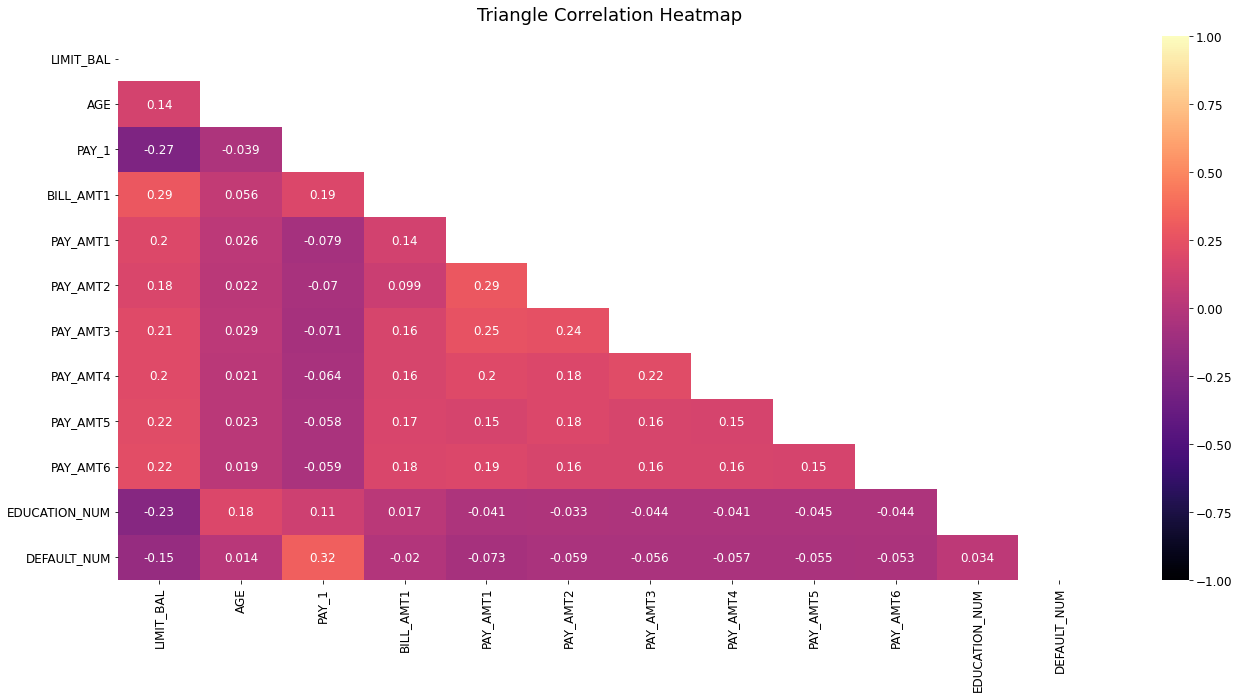

In [77]:
plt.figure(figsize=(22, 10))

mask = np.triu(np.ones_like(df[features_response].corr(), dtype=np.bool))
heatmap = sns.heatmap(df[features_response].corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='magma')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

While Pearson correlation is theoretically valid for continuous response variables, the binary response variable for the case study data could be considered categorical data, with only two categories: 0 and 1. Among the different kinds of tests we can run, to see whether features are associated with a categorical response, is the ANOVA F-test.

In the context of the F-test, the p-value answers the question: "For the samples in the positive class, how likely is it that the average value of this feature is the same as that of samples in the negative class?" If the data indicated that a feature has very different average values between the positive and negative classes, the following will 
be the case:
- It will be very unlikely that those average values are the same (low p-value).
- It will probably be a good feature in our model because it will help us discriminate between positive and negative classes.


In [79]:
X = df[features_response].iloc[:,:-1].values
y = df[features_response].iloc[:,-1].values
print(X.shape, y.shape)

(30000, 12) (30000,)


In [80]:
from sklearn.feature_selection import f_classif
[f_stat, f_p_value] = f_classif(X, y)

In [81]:
f_test_df = pd.DataFrame({'Feature':features_response[:-1], 'F statistic':f_stat, 'p value':f_p_value})
f_test_df = f_test_df.sort_values(by='p value', ascending=False)
f_test_df

,Feature,F statistic,p value
2,AGE,5.788556,1.613685e-02
4,BILL_AMT1,11.580532,6.673295e-04
1,MARRIAGE,17.781271,2.485364e-05
11,EDUCATION_NUM,34.395999,4.543558e-09
10,PAY_AMT6,85.089045,3.033589e-20
9,PAY_AMT5,91.429801,1.241345e-21
7,PAY_AMT3,95.218011,1.841770e-22
8,PAY_AMT4,97.188000,6.830942e-23
6,PAY_AMT2,103.291524,3.166657e-24
5,PAY_AMT1,160.403810,1.146488e-36


Other tests that can also be applied and that do not assume a normal distribution are the Mann-Whitney U-Test and the Kruskal-Wallis Test.

In [83]:
for i in features_response[:-1]:
    print(stats.mannwhitneyu(df[i].astype('float'), df['DEFAULT_NUM']))

MannwhitneyuResult(statistic=900000000.0, pvalue=0.0)
MannwhitneyuResult(statistic=853690266.0, pvalue=0.0)
MannwhitneyuResult(statistic=900000000.0, pvalue=0.0)
MannwhitneyuResult(statistic=364460850.0, pvalue=0.0)
MannwhitneyuResult(statistic=845514138.0, pvalue=0.0)
MannwhitneyuResult(statistic=803818956.0, pvalue=0.0)
MannwhitneyuResult(statistic=801106302.0, pvalue=0.0)
MannwhitneyuResult(statistic=790635042.0, pvalue=0.0)
MannwhitneyuResult(statistic=782545260.0, pvalue=0.0)
MannwhitneyuResult(statistic=777144768.0, pvalue=0.0)
MannwhitneyuResult(statistic=768538626.0, pvalue=0.0)
MannwhitneyuResult(statistic=864878970.0, pvalue=0.0)


In [84]:
MyList = []
for i in features_response[:-1]:
    MyList.append(stats.mannwhitneyu(df[i].astype('float'), df['DEFAULT_NUM']))

In [85]:
dfk = pd.DataFrame(MyList)
dfk['Features'] = features_response[:-1]
dfk = dfk[['Features', 'statistic', 'pvalue']].sort_values(by='statistic', ascending=False)
dfk

,Features,statistic,pvalue
0,LIMIT_BAL,900000000.0,0.0
2,AGE,900000000.0,0.0
11,EDUCATION_NUM,864878970.0,0.0
1,MARRIAGE,853690266.0,0.0
4,BILL_AMT1,845514138.0,0.0
5,PAY_AMT1,803818956.0,0.0
6,PAY_AMT2,801106302.0,0.0
7,PAY_AMT3,790635042.0,0.0
8,PAY_AMT4,782545260.0,0.0
9,PAY_AMT5,777144768.0,0.0


The conclusions we can draw from the DataFrame of F-statistics and p-values are similar to what we observed in the correlation plot: PAY_1 and LIMIT_BAL appear to be the most useful features. They have the smallest p-values, indicating the average values of these features are significantly different between the positive and negative classes, and these features will help predict which class a sample belongs to.


In [86]:
from sklearn.feature_selection import SelectPercentile

In [87]:
selector = SelectPercentile(f_classif, percentile=20)

In [88]:
selector.fit(X, y)

SelectPercentile(percentile=20)

In [89]:
SelectPercentile(percentile=20)

SelectPercentile(percentile=20)

In [90]:
best_feature_ix = selector.get_support()
best_feature_ix

array([ True, False, False,  True, False,  True, False, False, False,
       False, False, False])

In [91]:
features = features_response[:-1]

In [92]:
features

['LIMIT_BAL',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'EDUCATION_NUM']

In [93]:
best_features = [features[counter]
 for counter in range(len(features))
                 if best_feature_ix[counter]]
best_features

['LIMIT_BAL', 'PAY_1', 'PAY_AMT1']

In [94]:
overall_default_rate = df['DEFAULT_NUM'].mean()
overall_default_rate

0.2212

PAY_1 feature is sort of like a hybrid categorical and numerical feature. We'll choose to plot it in a way that is typical for categorical features, due to the relatively small number of unique values.

In [95]:
group_by_pay_mean_y = df.groupby('PAY_1').agg({'DEFAULT_NUM':np.mean})

In [96]:
group_by_pay_mean_y

,DEFAULT_NUM
PAY_1,
-2,0.132294
-1,0.167781
0,0.128113
1,0.339479
2,0.691414
3,0.757764
4,0.684211
5,0.500000
6,0.545455


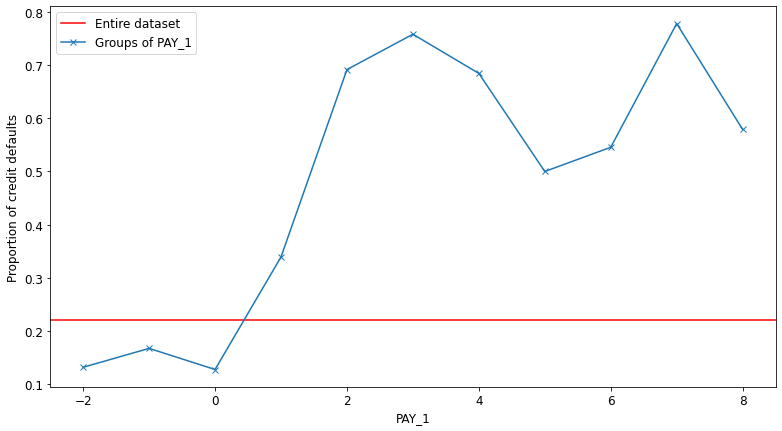

In [97]:
plt.figure(figsize=(13, 7))
axes = plt.axes()
axes.axhline(overall_default_rate, color='red')
group_by_pay_mean_y.plot(marker='x', legend=False, ax=axes)
axes.set_ylabel('Proportion of credit defaults')
axes.legend(['Entire dataset', 'Groups of PAY_1'])


Our visualization of payment statuses has revealed a clear, and probably  expected, story: those who defaulted before are in fact more likely to default  again. The default rate of accounts in good standing is well below the overall default rate, which we know from before is about 22%. However, over 30% of the accounts that were in default last month will be in default again next month, according to this.

Now we turn our attention to the feature ranked as having the second strongest association with the target variable: LIMIT_BAL. This is a numerical feature with many unique values. A good way to visualize features such as this, for a classification problem, is to plot multiple histograms on the same axis, with different colors for the different classes.

In [98]:
pos_mask = y == 1
neg_mask = y == 0

Text(0.5, 1.0, 'Credit limits by response variable')

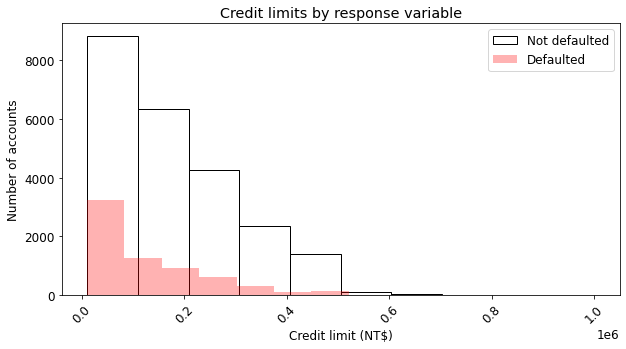

In [99]:
plt.figure(figsize=(10, 5))
mpl.rcParams['figure.dpi'] = 100
axes = plt.axes()
axes.hist(df.loc[neg_mask, 'LIMIT_BAL'],edgecolor='black', color='white')
axes.hist(df.loc[pos_mask, 'LIMIT_BAL'], alpha=0.3, edgecolor=None, color='red')
axes.tick_params(axis='x', labelrotation=45)
axes.set_xlabel('Credit limit (NT$)')
axes.set_ylabel('Number of accounts')
axes.legend(['Not defaulted', 'Defaulted'])
axes.set_title('Credit limits by response variable')


We already know this from examining the class fractions.

It would be more informative to show something about how the shapes of these histograms are different, not just their sizes. To emphasize this, we can make the total plotted area of the two histograms the same, by normalizing them. Matplotlib provides a keyword argument that makes this easy, creating what might be considered an empirical version of a probability mass function. This means that the integral or area contained within each histogram will be equal to 1 after normalization, since probabilities sum to 1

In [100]:
df['LIMIT_BAL'].max()

1000000

In [101]:
bin_edges = list(range(0,1000000,50000))
print(bin_edges)

[0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 550000, 600000, 650000, 700000, 750000, 800000, 850000, 900000, 950000]


Text(0.5, 1.0, 'Normalized distributions of credit limits by response variable')

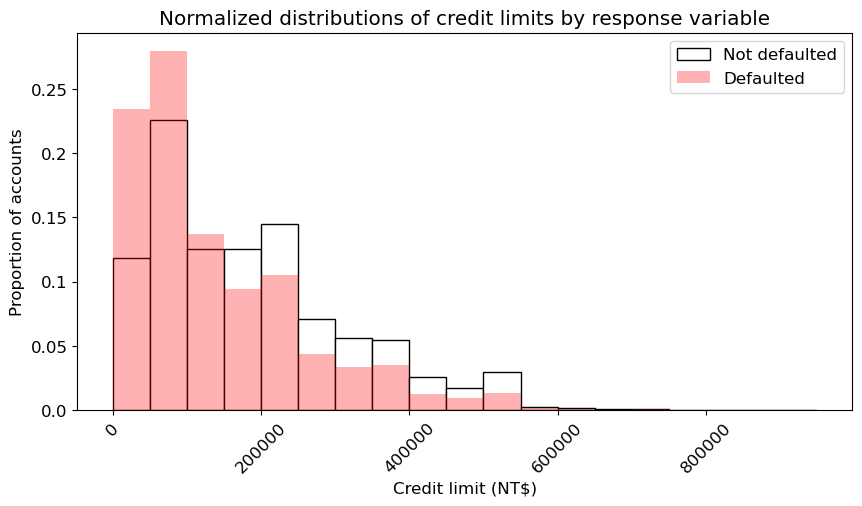

In [102]:
plt.figure(figsize=(10, 5))
mpl.rcParams['figure.dpi'] = 100 
axes = plt.axes()
axes.hist(df.loc[neg_mask, 'LIMIT_BAL'],bins=bin_edges, density=True, edgecolor='black', color='white')
axes.hist(df.loc[pos_mask, 'LIMIT_BAL'],bins=bin_edges, density=True, alpha=0.3, edgecolor=None, color='red')
axes.tick_params(axis='x', labelrotation=45)
axes.set_xlabel('Credit limit (NT$)')
axes.set_ylabel('Proportion of accounts')
y_ticks = axes.get_yticks()
axes.set_yticklabels(np.round(y_ticks*50000,2))
axes.legend(['Not defaulted', 'Defaulted'])
axes.set_title('Normalized distributions of credit limits by response variable')

It looks like the accounts that default tend to  have a higher proportion of lower credit limits. Accounts with credit limits less than NT$150,000 are relatively more likely to default, while the opposite is true for accounts with limits higher than this.

In [103]:
pay_amt_features = ['PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

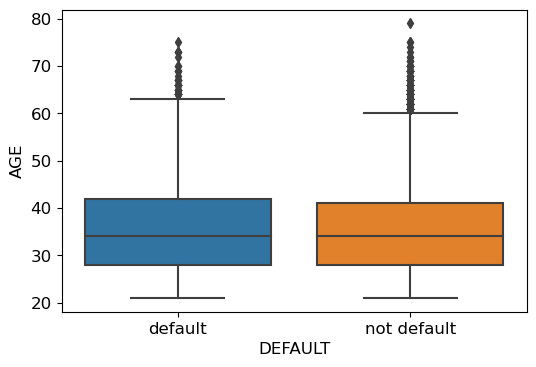

In [104]:
sns.boxplot(x='DEFAULT',y='AGE', data=df)
plt.show()

Doesn't seem that age is meaningful for whether or not a person is defaulting.

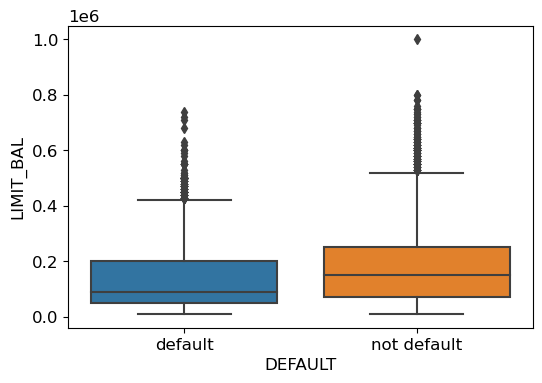

In [105]:
sns.boxplot(x='DEFAULT',y='LIMIT_BAL', data=df)
plt.show()

It looks like the amount of given credit relates a little for whether or not the person will default or not, it might be due to a more riskier person, the higher the credit given the more likely the person present a lower risk of default

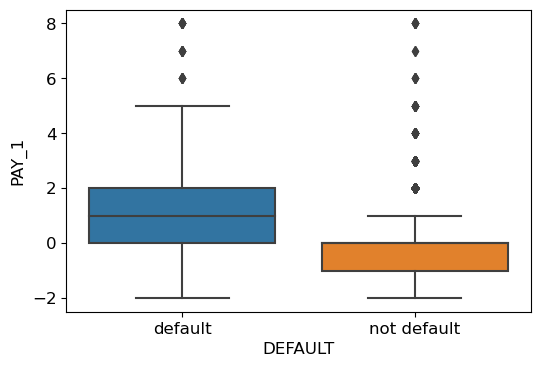

In [106]:
sns.boxplot(x='DEFAULT',y='PAY_1', data=df)
plt.show()

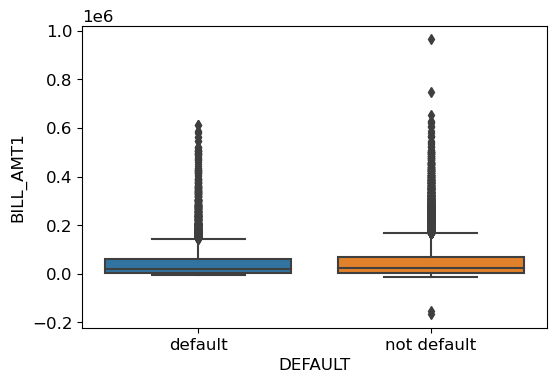

In [107]:
sns.boxplot(x='DEFAULT',y='BILL_AMT1', data=df)
plt.show()

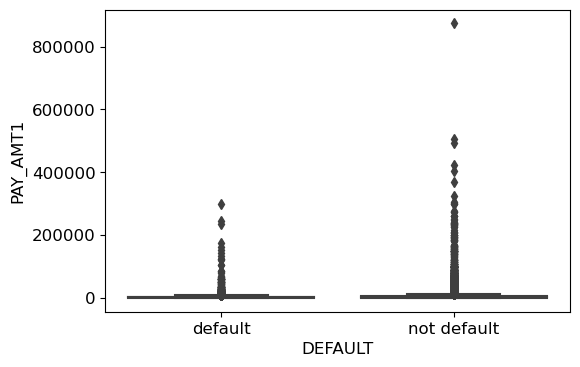

In [108]:
sns.boxplot(x='DEFAULT',y='PAY_AMT1', data=df)
plt.show()

By these Box plots we can confirm that the variables that are telling us more information on whether or not a person will default are LIMIT_BAL and PAY_1.

## Model Buildup

### Logistic Regression

#### Unbalanced

In [109]:
X = np.asarray(df[['LIMIT_BAL', 'MARRIAGE', 'AGE', 'PAY_1', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', \
                   'PAY_AMT5', 'PAY_AMT6', 'EDUCATION_NUM']])
X[0:5]

array([[20000, '1', 24, 2, 3913, 0, 689, 0, 0, 0, 0, 2.0],
       [120000, '2', 26, -1, 2682, 0, 1000, 1000, 1000, 0, 2000, 2.0],
       [90000, '2', 34, 0, 29239, 1518, 1500, 1000, 1000, 1000, 5000,
        2.0],
       [50000, '1', 37, 0, 46990, 2000, 2019, 1200, 1100, 1069, 1000,
        2.0],
       [50000, '1', 57, -1, 8617, 2000, 36681, 10000, 9000, 689, 679,
        2.0]], dtype=object)

In [110]:
y = np.asarray(df['DEFAULT_NUM'])
y [0:5]

array([1., 1., 0., 0., 0.])

In [111]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.13672015, -1.05729503, -1.24601985,  1.79456386, -0.64250107,
        -0.34194162, -0.22708564, -0.29680127, -0.30806256, -0.31413612,
        -0.29338206,  0.21186989],
       [-0.3659805 ,  0.85855728, -1.02904717, -0.87499115, -0.65921875,
        -0.34194162, -0.21358766, -0.24000461, -0.24422965, -0.31413612,
        -0.18087821,  0.21186989],
       [-0.59720239,  0.85855728, -0.16115646,  0.01486052, -0.29855966,
        -0.25029158, -0.19188673, -0.24000461, -0.24422965, -0.24868274,
        -0.01212243,  0.21186989],
       [-0.90549825, -1.05729503,  0.16430256,  0.01486052, -0.05749103,
        -0.22119058, -0.16936116, -0.22864528, -0.23784635, -0.24416646,
        -0.23713013,  0.21186989],
       [-0.90549825, -1.05729503,  2.33402934, -0.87499115, -0.57861809,
        -0.22119058,  1.33503416,  0.27116536,  0.26643369, -0.26903874,
        -0.255187  ,  0.21186989]])

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (24000, 12) (24000,)
Test set: (6000, 12) (6000,)


In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [114]:
yhat = LR.predict(X_test)
yhat

array([0., 0., 0., ..., 0., 0., 1.])

In [115]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.80555578, 0.19444422],
       [0.91111424, 0.08888576],
       [0.84524769, 0.15475231],
       ...,
       [0.90031488, 0.09968512],
       [0.79427677, 0.20572323],
       [0.46855114, 0.53144886]])

<b> Jaccard Index <b><br>

Let's try the jaccard index for accuracy evaluation. we can define jaccard as the size of the intersection divided by the size of the union of the two label sets. If the entire set of predicted labels for a sample strictly matches with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.


In [116]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.7920028060329709

In [117]:
LR.score(X_test,y_test)

0.8023333333333333

In [118]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 298 1064]
 [ 122 4516]]


Confusion matrix, without normalization
[[ 298 1064]
 [ 122 4516]]


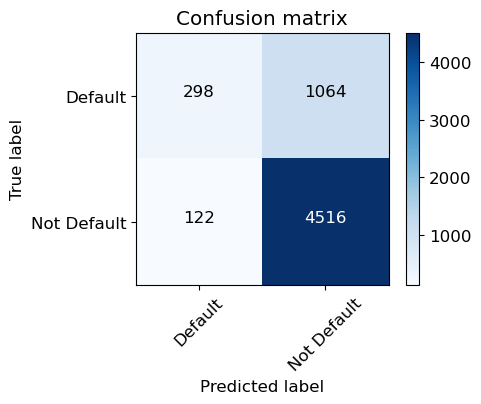

In [119]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure(figsize=(5, 4))
plot_confusion_matrix(cnf_matrix, classes=['Default','Not Default'],normalize= False,  title='Confusion matrix')

In [120]:
print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

         0.0       0.81      0.97      0.88      4638
         1.0       0.71      0.22      0.33      1362

    accuracy                           0.80      6000
   macro avg       0.76      0.60      0.61      6000
weighted avg       0.79      0.80      0.76      6000



<b>Log-loss:</b> is indicative of how close the prediction probability is to the corresponding actual/true value (0 or 1 in case of binary classification). The more the predicted probability diverges from the actual value, the higher is the log-loss value.

In [121]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.47553301503757106

Even if we are having a good accuracy, this is not the metric we should be using for our purposes. The main objective of this project is to minimize the false negatives (saying a person will not default when it is defaulting). For this to happen, the value of Recall for Default (=1) should be as high as possible. We believe that our recall is 22% in this first scenario because we are having an unbalanced dataset, only 28% of our observations have defaulted, that gives us 72% of people who did not default. For this case, we will use different techniques in order to try and balance our dataset and see if we can improve this situation.

#### Balanced

We'll use the Synthetic Minority Oversampling Technique (SMOTE) and a Random under-sampling technique in order to try and balance the dataset as much as we can without losing too much valuable information.

<b>SMOTE:</b> works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.<br>
<br>SMOTE algorithm works in 4 simple steps:
1. Choose a minority class as the input vector.
2. Find its k nearest neighbors (k_neighbors is specified as an argument in the SMOTE() function)
3. Choose one of these neighbors and place a synthetic point anywhere on the line joining the point under consideration and its chosen neighbor.
4. Repeat the steps until data is balanced.

<b>Random under-sampling:</b> is a fast and easy way to balance the data by randomly selecting a subset of data for the targeted classes. Under-sample the majority class(es) by randomly picking samples with or without replacement.

In [122]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

smote = SMOTE(sampling_strategy=0.6)
rus = RandomUnderSampler(sampling_strategy=1 ,random_state=42, replacement=True)

In [123]:
X_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0.0: 23364, 1.0: 6636})
Resample dataset shape Counter({0.0: 23364, 1.0: 14018})


In [124]:
X_combined_sample, y_combined_sample = rus.fit_resample(X_smote, y_smote)
print('Original dataset shape', Counter(y))
print('Combined Resample dataset shape', Counter(y_combined_sample))

Original dataset shape Counter({0.0: 23364, 1.0: 6636})
Combined Resample dataset shape Counter({0.0: 14018, 1.0: 14018})


In [125]:
X_train, X_test, y_train, y_test = train_test_split(X_combined_sample, y_combined_sample, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (22428, 12) (22428,)
Test set: (5608, 12) (5608,)


In [126]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [127]:
yhat = LR.predict(X_test)
yhat

array([0., 0., 1., ..., 0., 1., 0.])

In [128]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.52, 0.48],
       [0.6 , 0.4 ],
       [0.49, 0.51],
       ...,
       [0.69, 0.31],
       [0.2 , 0.8 ],
       [0.5 , 0.5 ]])

In [129]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.5246460409019402

In [130]:
from sklearn.metrics import accuracy_score
y_pred = LR.predict(X_test)
y_train_pred = LR.predict(X_train)


print('\nTest Accuracy Score for model5: ', accuracy_score(y_pred,y_test))
print('\nTrain Accuracy Score for model5: ', accuracy_score(y_train_pred,y_train))


Test Accuracy Score for model5:  0.6767118402282454

Train Accuracy Score for model5:  0.6682718031032637


In [131]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[1794  985]
 [ 828 2001]]


Confusion matrix, without normalization
[[1794  985]
 [ 828 2001]]


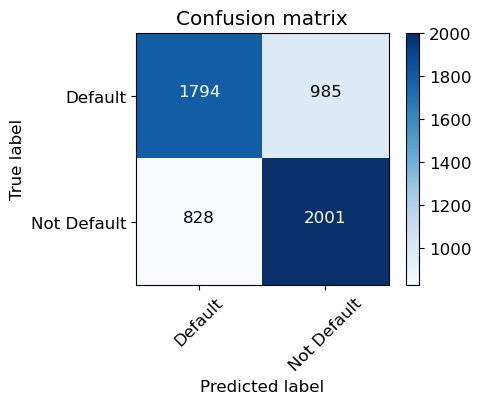

In [132]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure(figsize=(5, 4))
plot_confusion_matrix(cnf_matrix, classes=['Default','Not Default'],normalize= False,  title='Confusion matrix')

In [133]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

         0.0       0.67      0.71      0.69      2829
         1.0       0.68      0.65      0.66      2779

    accuracy                           0.68      5608
   macro avg       0.68      0.68      0.68      5608
weighted avg       0.68      0.68      0.68      5608



In [134]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6095854691319781

We can see by our results that we did increase the recall value for default, which means we are having less false negatives in our prediction. Still, we believe there's room for improvement, so we'll try different models and see how they perform.

### Decision Trees

#### Unbalanced

In [135]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [136]:
X = np.asarray(df[['LIMIT_BAL', 'MARRIAGE', 'AGE', 'PAY_1', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', \
                   'PAY_AMT5', 'PAY_AMT6', 'EDUCATION_NUM']])
X[0:5]

array([[20000, '1', 24, 2, 3913, 0, 689, 0, 0, 0, 0, 2.0],
       [120000, '2', 26, -1, 2682, 0, 1000, 1000, 1000, 0, 2000, 2.0],
       [90000, '2', 34, 0, 29239, 1518, 1500, 1000, 1000, 1000, 5000,
        2.0],
       [50000, '1', 37, 0, 46990, 2000, 2019, 1200, 1100, 1069, 1000,
        2.0],
       [50000, '1', 57, -1, 8617, 2000, 36681, 10000, 9000, 689, 679,
        2.0]], dtype=object)

In [137]:
y = np.asarray(df['DEFAULT_NUM'])
y [0:5]

array([1., 1., 0., 0., 0.])

In [138]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (24000, 12) (24000,)
Test set: (6000, 12) (6000,)


In [139]:
DTC = DecisionTreeClassifier()
model = DTC.fit(X_train, y_train) 

In [140]:
yhat = DTC.predict(X_test)
yhat [0:5]

array([0., 0., 0., 0., 1.])

In [141]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82      4638
         1.0       0.39      0.41      0.40      1362

    accuracy                           0.72      6000
   macro avg       0.61      0.61      0.61      6000
weighted avg       0.73      0.72      0.73      6000



In [142]:
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class.append(('Gradient Boosting Classifier', GradientBoostingClassifier()))

In [143]:
#classification
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, X,y, cv=3, scoring='recall')
    names.append(name)
    results.append(result)

In [144]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.35488245931283907
Decision Tree Classifier 0.4213381555153706
Gradient Boosting Classifier 0.33710066305003017


#### Balanced

Let's try and balance our dataset.

In [145]:
X_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0.0: 23364, 1.0: 6636})
Resample dataset shape Counter({0.0: 23364, 1.0: 14018})


In [146]:
X_combined_sample, y_combined_sample = rus.fit_resample(X_smote, y_smote)
print('Original dataset shape', Counter(y))
print('Combined Resample dataset shape', Counter(y_combined_sample))

Original dataset shape Counter({0.0: 23364, 1.0: 6636})
Combined Resample dataset shape Counter({0.0: 14018, 1.0: 14018})


In [147]:
X_train, X_test, y_train, y_test = train_test_split(X_combined_sample, y_combined_sample, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (22428, 12) (22428,)
Test set: (5608, 12) (5608,)


In [148]:
yhat = DTC.predict(X_test)

In [149]:
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, X_combined_sample,y_combined_sample, cv=3, scoring='recall')
    names.append(name)
    results.append(result)

In [150]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.7375553859390435
Decision Tree Classifier 0.7248573395255167
Gradient Boosting Classifier 0.6943970884181644


It looks like Random Forest and Decision Trees classifiers are giving us a pretty good recall (as far as we compared them to the other models we have tested). But let's take a deeper look to them in order to determine if they are suited for recommendation. 

In [151]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

         0.0       0.77      0.96      0.85      2829
         1.0       0.95      0.70      0.81      2779

    accuracy                           0.83      5608
   macro avg       0.86      0.83      0.83      5608
weighted avg       0.86      0.83      0.83      5608



In [152]:
RF = RandomForestClassifier()
model_RF = RF.fit(X_train, y_train) 

In [153]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, RF.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9994203673978955
Test set Accuracy:  0.8339871611982882


In [154]:
from sklearn.metrics import roc_auc_score
y_train_pred = RF.predict_proba(X_train)[:,1]
y_test_pred = RF.predict_proba(X_test)[:,1]

print("AUC Train: {:.4f}\nAUC Valid: {:.4f}".format(roc_auc_score(y_train, y_train_pred),
                                                    roc_auc_score(y_test, y_test_pred)))

AUC Train: 1.0000
AUC Valid: 0.9281


In [155]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, DTC.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8311931514178705
Test set Accuracy:  0.8339871611982882


In [156]:
y_train_pred = DTC.predict_proba(X_train)[:,1]
y_test_pred = DTC.predict_proba(X_test)[:,1]

print("AUC Train: {:.4f}\nAUC Valid: {:.4f}".format(roc_auc_score(y_train, y_train_pred),
                                                    roc_auc_score(y_test, y_test_pred)))

AUC Train: 0.8331
AUC Valid: 0.8339


This time, we'll be sticking to the Decision Trees model, not only because it's not suffering from overfitting, but also because it's the simplest and more interpretable for business use.

### K-Nearest Neighbors

#### Unbalanced

In [157]:
X = np.asarray(df[['LIMIT_BAL', 'MARRIAGE', 'AGE', 'PAY_1', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', \
                   'PAY_AMT5', 'PAY_AMT6', 'EDUCATION_NUM']])
X[0:5]

array([[20000, '1', 24, 2, 3913, 0, 689, 0, 0, 0, 0, 2.0],
       [120000, '2', 26, -1, 2682, 0, 1000, 1000, 1000, 0, 2000, 2.0],
       [90000, '2', 34, 0, 29239, 1518, 1500, 1000, 1000, 1000, 5000,
        2.0],
       [50000, '1', 37, 0, 46990, 2000, 2019, 1200, 1100, 1069, 1000,
        2.0],
       [50000, '1', 57, -1, 8617, 2000, 36681, 10000, 9000, 689, 679,
        2.0]], dtype=object)

In [158]:
y = np.asarray(df['DEFAULT_NUM'])
y [0:5]

array([1., 1., 0., 0., 0.])

In [159]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.14, -1.06, -1.25,  1.79, -0.64, -0.34, -0.23, -0.3 , -0.31,
        -0.31, -0.29,  0.21],
       [-0.37,  0.86, -1.03, -0.87, -0.66, -0.34, -0.21, -0.24, -0.24,
        -0.31, -0.18,  0.21],
       [-0.6 ,  0.86, -0.16,  0.01, -0.3 , -0.25, -0.19, -0.24, -0.24,
        -0.25, -0.01,  0.21],
       [-0.91, -1.06,  0.16,  0.01, -0.06, -0.22, -0.17, -0.23, -0.24,
        -0.24, -0.24,  0.21],
       [-0.91, -1.06,  2.33, -0.87, -0.58, -0.22,  1.34,  0.27,  0.27,
        -0.27, -0.26,  0.21]])

In [160]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (24000, 12) (24000,)
Test set: (6000, 12) (6000,)


In [161]:
from sklearn.neighbors import KNeighborsClassifier

In [162]:
k = 8
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=8)

In [163]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([0., 0., 0., 0., 0.])

In [164]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.83025
Test set Accuracy:  0.8025


In [165]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.73, 0.78, 0.77, 0.79, 0.78, 0.79, 0.8 , 0.8 , 0.8 ])

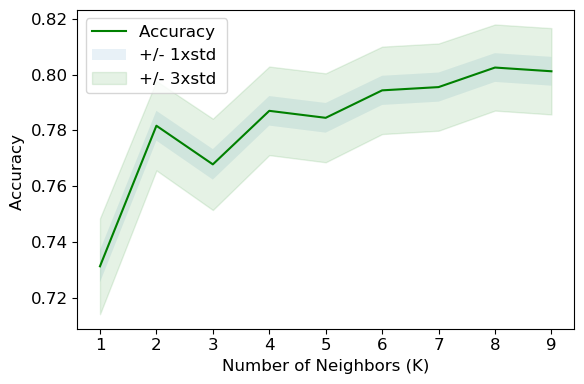

In [166]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [167]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.8025 with k= 8


In [168]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

         0.0       0.83      0.94      0.88      4638
         1.0       0.61      0.34      0.44      1362

    accuracy                           0.80      6000
   macro avg       0.72      0.64      0.66      6000
weighted avg       0.78      0.80      0.78      6000



#### Balanced

Balancing our dataset.

In [169]:
X_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0.0: 23364, 1.0: 6636})
Resample dataset shape Counter({0.0: 23364, 1.0: 14018})


In [170]:
X_combined_sample, y_combined_sample = rus.fit_resample(X_smote, y_smote)
print('Original dataset shape', Counter(y))
print('Combined Resample dataset shape', Counter(y_combined_sample))

Original dataset shape Counter({0.0: 23364, 1.0: 6636})
Combined Resample dataset shape Counter({0.0: 14018, 1.0: 14018})


In [171]:
X_train, X_test, y_train, y_test = train_test_split(X_combined_sample, y_combined_sample, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (19625, 12) (19625,)
Test set: (8411, 12) (8411,)


In [172]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [173]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1., 0., 0., 0., 1.])

In [174]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.861859872611465
Test set Accuracy:  0.7548448460349543


In [175]:
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.83, 0.79, 0.77, 0.75, 0.74, 0.74, 0.74, 0.73, 0.73, 0.73, 0.72,
       0.73, 0.72, 0.72])

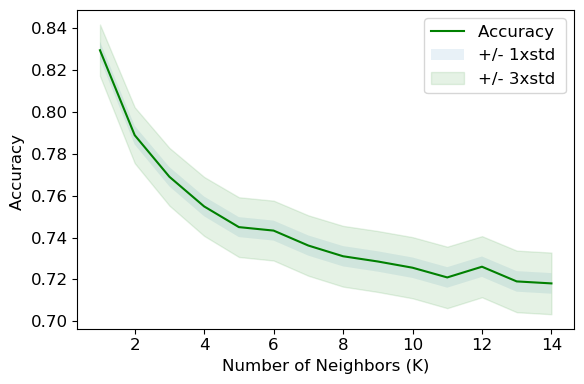

In [176]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [177]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.8293900844132683 with k= 1


Confusion matrix, without normalization
[[2915 1235]
 [1136 3125]]


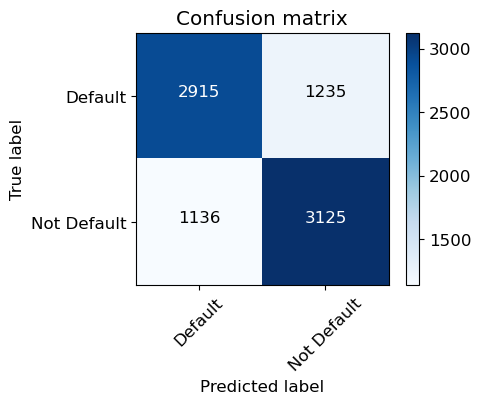

In [178]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure(figsize=(5, 4))
plot_confusion_matrix(cnf_matrix, classes=['Default','Not Default'],normalize= False,  title='Confusion matrix')

In [179]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

         0.0       0.72      0.73      0.72      4261
         1.0       0.72      0.70      0.71      4150

    accuracy                           0.72      8411
   macro avg       0.72      0.72      0.72      8411
weighted avg       0.72      0.72      0.72      8411



In [180]:
from sklearn.metrics import roc_auc_score
y_train_pred = neigh.predict_proba(X_train)[:,1]
y_test_pred = neigh.predict_proba(X_test)[:,1]

print("AUC Train: {:.4f}\nAUC Valid: {:.4f}".format(roc_auc_score(y_train, y_train_pred),
                                                    roc_auc_score(y_test, y_test_pred)))

AUC Train: 0.8452
AUC Valid: 0.7915


Even though we are having a good recall, it looks like our model is overfitting, it might be due to the fact that we used SMOTE algorithm to balance our data.

### Support Vector Machines (SVM)

<b>SVM</b> works by mapping data to a high-dimensional feature space so that data points can be categorized, even when the data are not otherwise linearly separable. A separator between the categories is found, then the data is transformed in such a way that the separator could be drawn as a hyperplane. Following this, characteristics of new data can be used to predict the group to which a new record should belong.

#### Unbalanced

In [181]:
X = np.asarray(df[['LIMIT_BAL', 'MARRIAGE', 'AGE', 'PAY_1', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', \
                   'PAY_AMT5', 'PAY_AMT6', 'EDUCATION_NUM']])
X[0:5]

array([[20000, '1', 24, 2, 3913, 0, 689, 0, 0, 0, 0, 2.0],
       [120000, '2', 26, -1, 2682, 0, 1000, 1000, 1000, 0, 2000, 2.0],
       [90000, '2', 34, 0, 29239, 1518, 1500, 1000, 1000, 1000, 5000,
        2.0],
       [50000, '1', 37, 0, 46990, 2000, 2019, 1200, 1100, 1069, 1000,
        2.0],
       [50000, '1', 57, -1, 8617, 2000, 36681, 10000, 9000, 689, 679,
        2.0]], dtype=object)

In [182]:
y = np.asarray(df['DEFAULT_NUM'])
y [0:5]

array([1., 1., 0., 0., 0.])

SVMs assume that the data it works with is in a standard range, usually either 0 to 1, or -1 to 1 (roughly). So the normalization of feature vectors prior to feeding them to the SVM is very important. (This is often called whitening, although there are different types of whitening.)

In [183]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.14, -1.06, -1.25,  1.79, -0.64, -0.34, -0.23, -0.3 , -0.31,
        -0.31, -0.29,  0.21],
       [-0.37,  0.86, -1.03, -0.87, -0.66, -0.34, -0.21, -0.24, -0.24,
        -0.31, -0.18,  0.21],
       [-0.6 ,  0.86, -0.16,  0.01, -0.3 , -0.25, -0.19, -0.24, -0.24,
        -0.25, -0.01,  0.21],
       [-0.91, -1.06,  0.16,  0.01, -0.06, -0.22, -0.17, -0.23, -0.24,
        -0.24, -0.24,  0.21],
       [-0.91, -1.06,  2.33, -0.87, -0.58, -0.22,  1.34,  0.27,  0.27,
        -0.27, -0.26,  0.21]])

In [184]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (24000, 12) (24000,)
Test set: (6000, 12) (6000,)


In [185]:
from sklearn import svm
clf = svm.SVC(kernel='sigmoid')
clf.fit(X_train, y_train) 

SVC(kernel='sigmoid')

In [186]:
yhat = clf.predict(X_test)
yhat [0:5]

array([0., 0., 0., 0., 1.])

In [187]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 470  892]
 [ 796 3842]]


Confusion matrix, without normalization
[[ 470  892]
 [ 796 3842]]


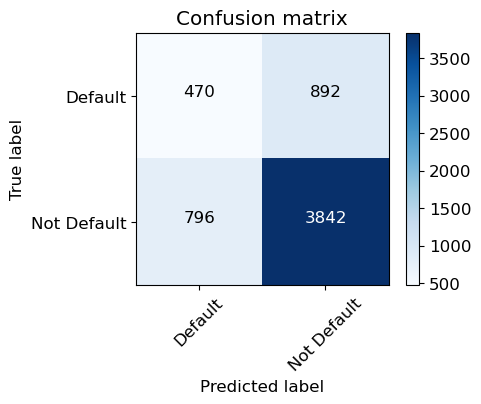

In [188]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure(figsize=(5, 4))
plot_confusion_matrix(cnf_matrix, classes=['Default','Not Default'],normalize= False,  title='Confusion matrix')

In [189]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

         0.0       0.81      0.83      0.82      4638
         1.0       0.37      0.35      0.36      1362

    accuracy                           0.72      6000
   macro avg       0.59      0.59      0.59      6000
weighted avg       0.71      0.72      0.71      6000



In [190]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.694755877034358

In [191]:
y_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)

print('\nTest Accuracy Score for model5: ', accuracy_score(y_pred,y_test))
print('\nTrain Accuracy Score for model5: ', accuracy_score(y_train_pred,y_train))


Test Accuracy Score for model5:  0.7186666666666667

Train Accuracy Score for model5:  0.721125


#### Balanced

Let's try by balancing our dataset.

In [192]:
X_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0.0: 23364, 1.0: 6636})
Resample dataset shape Counter({0.0: 23364, 1.0: 14018})


In [193]:
X_combined_sample, y_combined_sample = rus.fit_resample(X_smote, y_smote)
print('Original dataset shape', Counter(y))
print('Combined Resample dataset shape', Counter(y_combined_sample))

Original dataset shape Counter({0.0: 23364, 1.0: 6636})
Combined Resample dataset shape Counter({0.0: 14018, 1.0: 14018})


In [194]:
X_train, X_test, y_train, y_test = train_test_split(X_combined_sample, y_combined_sample, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (22428, 12) (22428,)
Test set: (5608, 12) (5608,)


In [195]:
clf = svm.SVC()
clf.fit(X_train, y_train) 

SVC()

In [196]:
yhat = clf.predict(X_test)
yhat [0:5]

array([0., 0., 0., 0., 1.])

In [197]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[1561 1218]
 [ 494 2335]]


Confusion matrix, without normalization
[[1561 1218]
 [ 494 2335]]


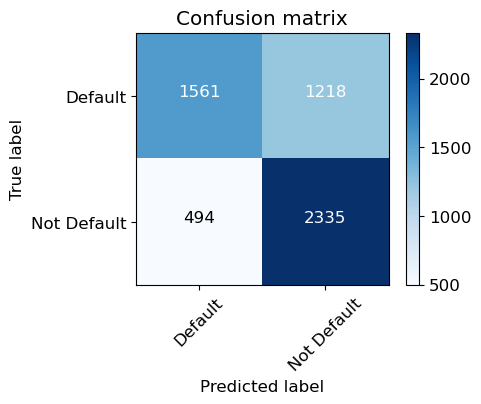

In [198]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure(figsize=(5, 4))
plot_confusion_matrix(cnf_matrix, classes=['Default','Not Default'],normalize= False,  title='Confusion matrix')

In [199]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

         0.0       0.66      0.83      0.73      2829
         1.0       0.76      0.56      0.65      2779

    accuracy                           0.69      5608
   macro avg       0.71      0.69      0.69      5608
weighted avg       0.71      0.69      0.69      5608



In [200]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.5769705955028416

In [201]:
y_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)

print('\nTest Accuracy Score for model5: ', accuracy_score(y_pred,y_test))
print('\nTrain Accuracy Score for model5: ', accuracy_score(y_train_pred,y_train))


Test Accuracy Score for model5:  0.6947218259629101

Train Accuracy Score for model5:  0.7014892099161762


### Predicting Amount of the Given Credit (Avoiding Customer Default)

Let's start by dropping all of the customers that defaulted from our dataset.

In [202]:
df_drop = df[(df['DEFAULT_NUM']==1)][['LIMIT_BAL', 'MARRIAGE', 'AGE', 'PAY_1', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', \
                   'PAY_AMT5', 'PAY_AMT6', 'EDUCATION_NUM', 'DEFAULT_NUM']].sort_values(by='LIMIT_BAL', ascending=False)

In [203]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [213]:
poly = PolynomialFeatures(degree=1)


In [214]:
X = np.asarray(df_drop[['MARRIAGE', 'AGE', 'PAY_1', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', \
                   'PAY_AMT5', 'PAY_AMT6', 'EDUCATION_NUM']])
X[0:5]

array([['1', 35, 2, 960, 8229, 1487, 15754, 9012, 25596, 7003, 2.0],
       ['1', 40, 0, 308274, 8500, 6000, 6000, 5237, 3000, 8961, 1.0],
       ['1', 40, -2, 5200, 0, 0, 1004, 0, 8000, 5000, 2.0],
       ['2', 30, 0, 39639, 0, 10296, 25219, 7341, 163123, 7267, 1.0],
       ['2', 29, 0, 497106, 15868, 12371, 26454, 8510, 11039, 5390, 1.0]],
      dtype=object)

In [215]:
y = np.asarray(df_drop['LIMIT_BAL'])
y [0:5]

array([740000, 720000, 710000, 680000, 630000], dtype=object)

In [216]:
poly_features = poly.fit_transform(X)

In [217]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (5308, 12) (5308,)
Test set: (1328, 12) (1328,)


In [218]:
from sklearn.linear_model import LinearRegression

poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train)

LinearRegression()

In [219]:
poly_reg_y_predicted = poly_reg_model.predict(X_test)
from sklearn.metrics import mean_squared_error
poly_reg_rmse = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted))
poly_reg_rmse


95103.19208645436

In [220]:
from sklearn.metrics import r2_score

print("R2-score: %.2f" % r2_score(y_test,poly_reg_y_predicted ))

R2-score: 0.33


In [221]:
round(poly_reg_model.score(X_test,y_test),2)

0.33

Our regression model did not perform as we intended in order to predict the amount of a given credit to a customer for it to not default.

## Conclusions

- We identify two features that could possibly explain and have the more impact in identifying whether or not a customer will default, the amount of the given credit (LIMIT_BAL) and the history of past payment (PAY_1). We maintain deeply concerns about how the data was collected, we found too many inconsistencies in it structure and we incite CreditOne to act in this matter given the importance of it.

- We identify that people with a lower credit limit tend to default more than the ones with higher limits (which makes sense, given a customer probably poor qualification). Also, it looks clear that the people who defaulted in the past are more likely to also default the next month.

- After performing several models with different methods, we identify the Decision Tree Classifier as our go to model for this task, it's the simplest one to interpret and the one which performed the best by reducing the false negative predictions, which is our main objective for this matter given the complex situation of CreditOne (increase in customers default rates). The score of our recall model is 72%, we believe this is the best performance we are going to get with the data we receive for this situation.

- We couldn't find a robust model with the data provided to predict the given credit amount CreditOne should give a customer in order to avoid a default situation.